# Tensorflow Core API

## Linear Regression from Scratch

In this notebook, we will implement linear regression completely from scratch using the TF Core API and a toy dataset, as an example. The goal is to illustrate the API.


##### Import the required modules

In [1]:
import tensorflow as tf

# this is a popular plot library for python
import matplotlib.pyplot as plt
%matplotlib inline  

2022-10-28 14:02:49.457046: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 14:02:49.565055: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-28 14:02:49.570486: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-28 14:02:49.570504: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

##### Generate some training data

Let's generate some training data. This is a toy example, so we'll generate data according to a linear model plus some noise.
Notice that `Y_train` is constructed using only TensorFlow ops thanks to operator overloading.

In [3]:
X_train=tf.constant(range(10), dtype=tf.float32)
Y_train=3*X_train + 5 + tf.random.normal(X_train.shape, 0.0, 0.1)

print("Train X:{}".format(X_train))
print("Train Y:{}".format(Y_train))

Train X:[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Train Y:[ 4.8273697  7.9172955 11.081112  13.939255  16.90396   20.040884
 23.074469  25.998684  29.031342  31.95326  ]


##### Generate some test data

Let's generate two more tensors for testing, in the same way.

In [4]:
X_test=tf.constant(range(10, 20), dtype=tf.float32)
Y_test=3 * X_test + 5 + tf.random.normal(X_test.shape, 0.0, 0.1)

print("Test X:{}".format(X_test))
print("Test Y:{}".format(Y_test))

Test X:[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Test Y:[35.000328 37.82533  40.98049  43.92942  46.988956 50.034386 53.026443
 55.98174  59.26604  61.916466]


##### Define the model

Let us define our model using a Python function as: 

                                            
$$Y = w_1 X + w_0$$

In [5]:
def my_model(X, w0, w1):
    return w1*X + w0

##### Define the loss function

Let us define a loss function to train the model. Since this is a regression problem, we'll use the Mean Squared Error (MSE) loss. Notice that the MSE is already defined in `tf.losses` and we could have used that, but here we're re-inventing the wheel to show you the entire process from scratch.

In [6]:
def loss_mse(Y_real, Y_pred):
    return tf.reduce_mean((Y_real-Y_pred)**2)

`tf.reduce_mean` : It takes an array as input ad computes the mean of it transforming it into a scalar value


##### Define a training step

Let us define a function that performs the forward and backward passes of gradient-based training. This function calculates the output of the model and the corresponding loss function (forward pass). Then it computes the gradient of the loss with respect to the model parameters `w0` and `w1` (backward pass).

In [7]:
def compute_gradients(X, Y, w0, w1):
    with tf.GradientTape() as tape:
        Y_pred = my_model(X, w0, w1)
        loss=loss_mse(Y, Y_pred)
    return tape.gradient(loss, [w0, w1])

##### Build the training loop

Now let us put the pieces together to construct the training loop. First let us initialize some constants, such as the learning rate and the number of training steps to perform.

In [8]:
STEPS=1000
LEARNING_RATE=.01

Then let us declare two `tf.Variable` objects to store the values of our trainable weights. Remember: we initialize weights to 0 because this is linear regression. This would never be done for training a  Neural Network.

In [9]:
w0=tf.Variable(0.0)
w1=tf.Variable(0.0)

Lastly, let us execute the training loop, printing the current status every 100 steps.

`field.assign_sub(value)` : updates the field by subtracting the (value)

In [10]:
for i in range(STEPS):
    dw0, dw1 = compute_gradients(X_train, Y_train, w0, w1)
    w0.assign_sub(dw0 * LEARNING_RATE)
    w1.assign_sub(dw1 * LEARNING_RATE)

    if i % 100 == 0:
        Y_hat_train = my_model(X_train, w0, w1)
        loss = loss_mse(Y_train, Y_hat_train)
        print("Step {}, Loss: {}, w0: {}, w1: {}\n".format(i, loss, w0.numpy(), w1.numpy()))


Step 0, Loss: 76.34874725341797, w0: 0.36953529715538025, w1: 2.159970283508301

Step 100, Loss: 1.7341028451919556, w0: 2.476682424545288, w1: 3.4022278785705566

Step 200, Loss: 0.5619574785232544, w0: 3.533388376235962, w1: 3.2337100505828857

Step 300, Loss: 0.1843193769454956, w0: 4.133181095123291, w1: 3.1380584239959717

Step 400, Loss: 0.06265302747488022, w0: 4.473627090454102, w1: 3.083765745162964

Step 500, Loss: 0.02345506101846695, w0: 4.666866779327393, w1: 3.0529489517211914

Step 600, Loss: 0.0108264721930027, w0: 4.776549816131592, w1: 3.0354573726654053

Step 700, Loss: 0.006757698953151703, w0: 4.838809013366699, w1: 3.0255284309387207

Step 800, Loss: 0.005446918308734894, w0: 4.874145030975342, w1: 3.0198934078216553

Step 900, Loss: 0.00502458680421114, w0: 4.89420223236084, w1: 3.0166945457458496



##### Analyze Results

As you can see, the loss is decreasing as expected, and the values of `w1` and `w0` are approaching 5 and 3 respectively, which are those of the model used to generate the data.

Notice that this is, again, a toy example, so we don't have mini-batches, validation sets, etc.

Let us evaluate our loss on test data.

In [11]:
Y_pred_test = my_model(X_test, w0, w1)
loss=loss_mse(Y_test, Y_pred_test)
print(loss.numpy())

0.025418496


##### Visualize Results

Finally, let us plot the real and predicted test samples.

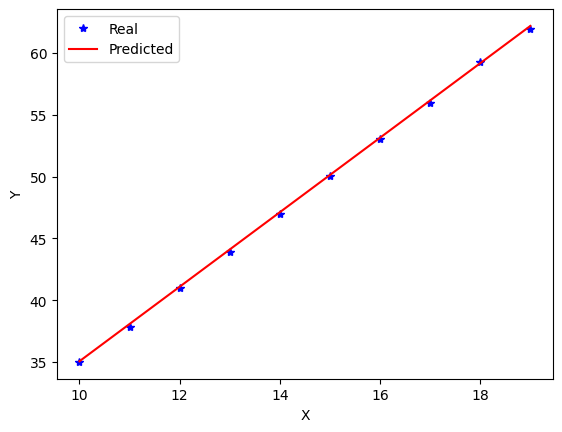

In [12]:
Y_hat_test = my_model(X_test, w0, w1)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X_test, Y_test, 'b*')
ax.plot(X_test, Y_hat_test, 'r-')
ax.legend(['Real', 'Predicted'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7817b2ad-42a3-441f-8072-b020be286d3c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>